# Heart Failure Prediction

## Workflow

1. Read Data [done]
2. Data Splitting [done]
3. EDA [done]
4. Preprocessing
  - Treat Outlier
  - LabelEncoding
  - OHE? 
5. Modeling with Baseline
6. Modeling with Logistic Regression
7. Modeling with Cross Validation and Hyperparameter Tuning

### Data Dictionary
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [257]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings as wrn
wrn.filterwarnings("ignore")

### Read Data 

In [258]:
def read_data(filename):
    DATA_PATH = 'data/'
    data = pd.read_csv(DATA_PATH + filename)
    
    return data

In [259]:
DATA_PATH = 'data/'

In [260]:
data = read_data('heart.csv')

In [261]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [262]:
data.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [263]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [264]:
data.shape

(918, 12)

### Check Duplicate 

In [265]:
data.duplicated().sum()

0

### Data Splitting 

In [266]:
def split_input_output(data, target_col):
    X = data.drop(columns=target_col)
    y = data[target_col]
    
    return X, y

In [267]:
X, y = split_input_output(data = data,
                          target_col = "HeartDisease")

In [268]:
X.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up


In [269]:
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [270]:
from sklearn.model_selection import train_test_split

In [271]:
y.value_counts(normalize=True)

1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64

In [272]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    stratify = y,
                                                    random_state = 42)

In [273]:
print(f"Training set shape: {X_train.shape, y_train.shape}")
print(f"Test set shape: {X_test.shape, y_test.shape}")

Training set shape: ((734, 11), (734,))
Test set shape: ((184, 11), (184,))


In [274]:
y_train.value_counts()

1    406
0    328
Name: HeartDisease, dtype: int64

In [275]:
y_test.value_counts()

1    102
0     82
Name: HeartDisease, dtype: int64

### Check Missing Values

In [276]:
X_train.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [277]:
y_train.isnull().sum()

0

In [278]:
X_test.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
dtype: int64

In [279]:
y_test.isnull().sum()

0

### EDA

#### Create Helper Function 

In [280]:
def distribution_plot(column):
    plt.figure(figsize=(10, 9))
    plt.title(f"{column} Data Distribution")
    sns.distplot(X_train[column])

In [281]:
def count_plot(column):
    plt.figure(figsize=(10,9))
    plt.title(f"{column} Count Plot")
    ax = sns.countplot(X_train, x=column, alpha=0.8, order = X_train[column].value_counts().index)
    ax.bar_label(ax.containers[0])

In [282]:
COLS_CATEGORICAL = ["Sex", "ChestPainType", "FastingBS",
                   "RestingECG", "ExerciseAngina", "ST_Slope"]

In [283]:
COLS_NUMS = ["Age", "RestingBP", "Cholesterol", "MaxHR", "Oldpeak"]

### Categorical Data Count 

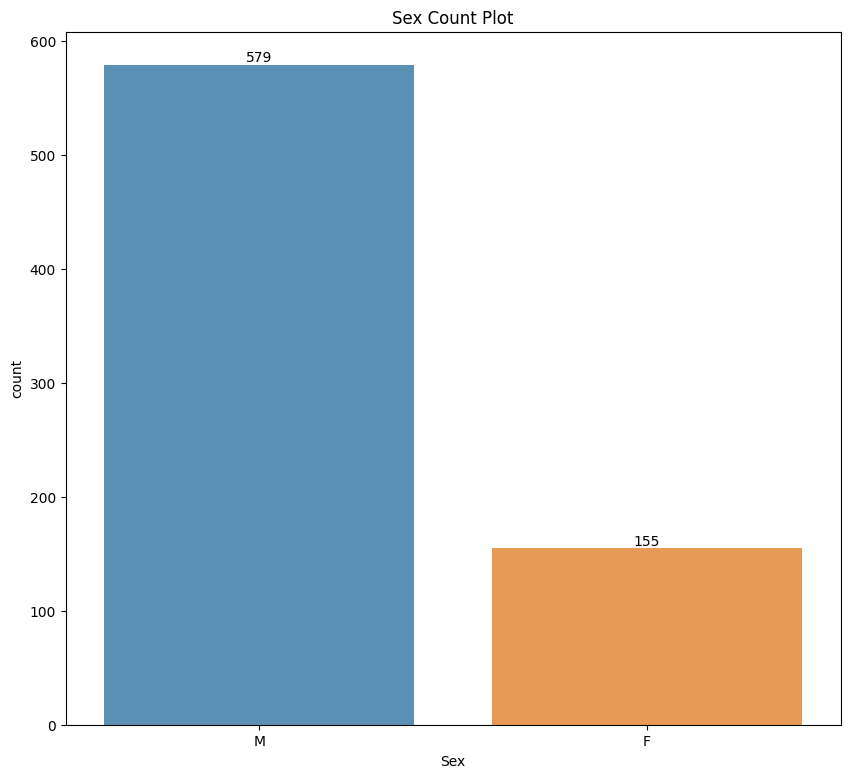

In [284]:
count_plot("Sex")

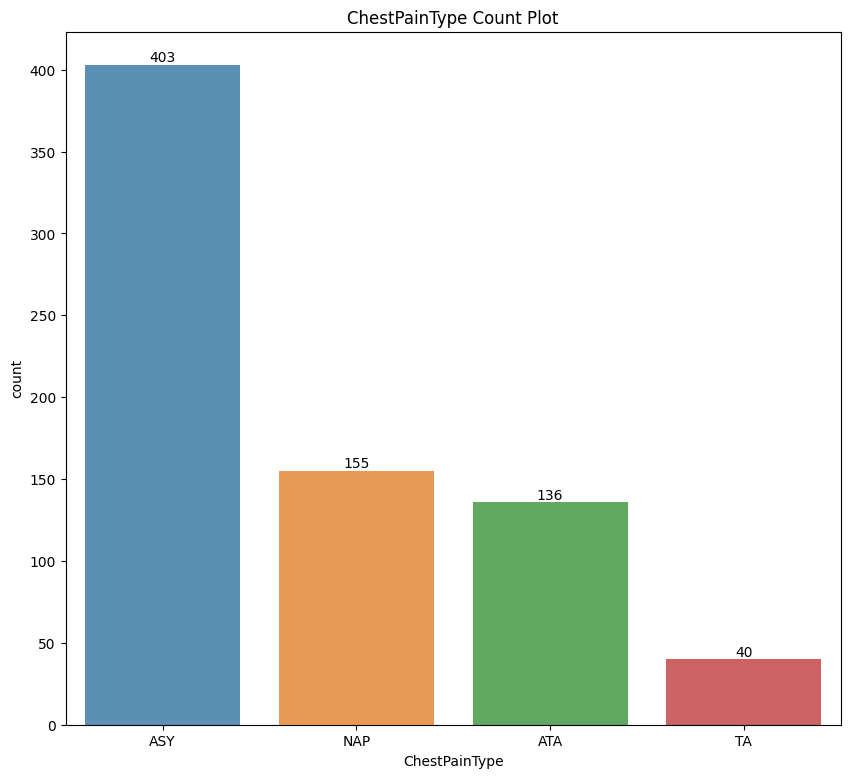

In [285]:
count_plot("ChestPainType")

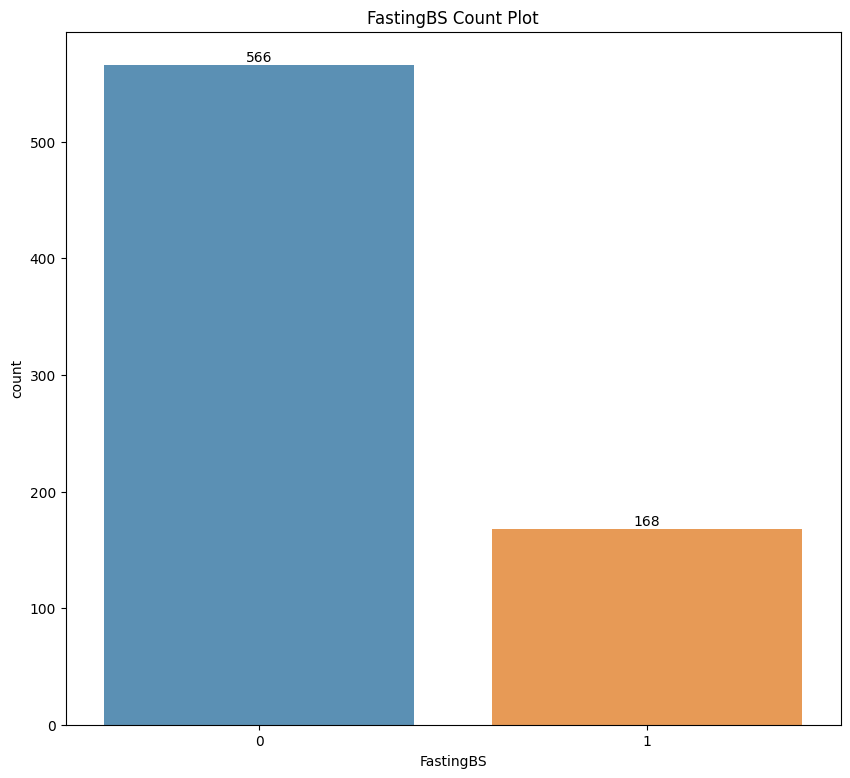

In [286]:
count_plot("FastingBS")

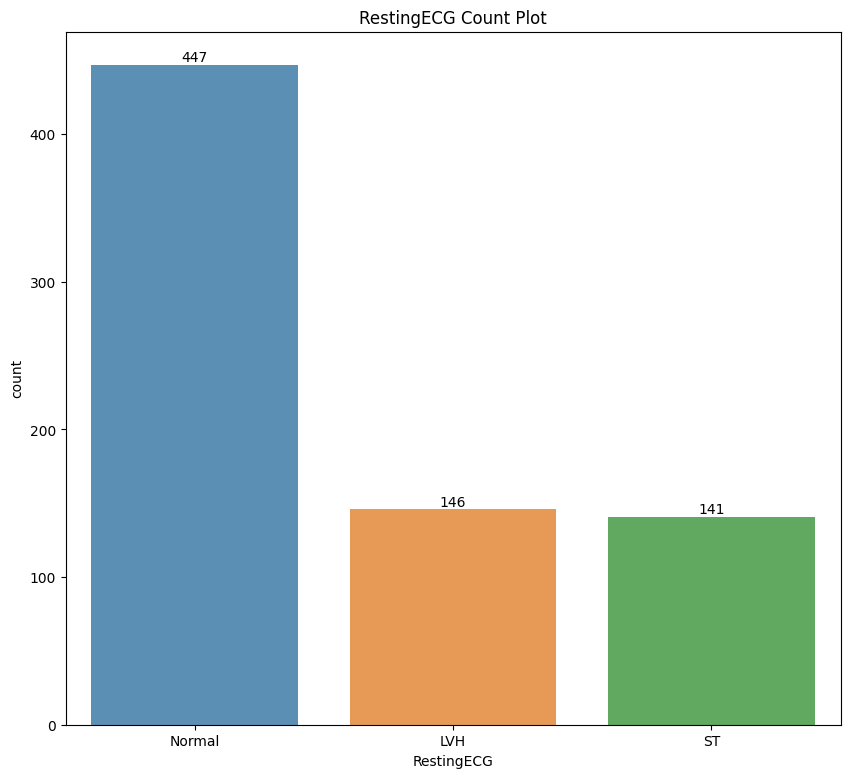

In [287]:
count_plot("RestingECG")

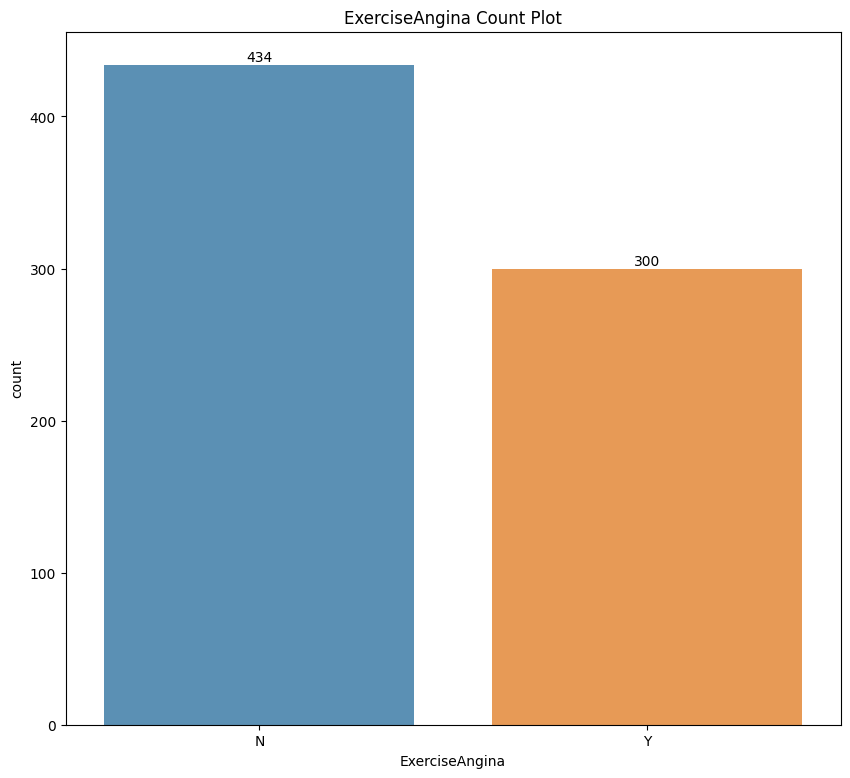

In [288]:
count_plot("ExerciseAngina")

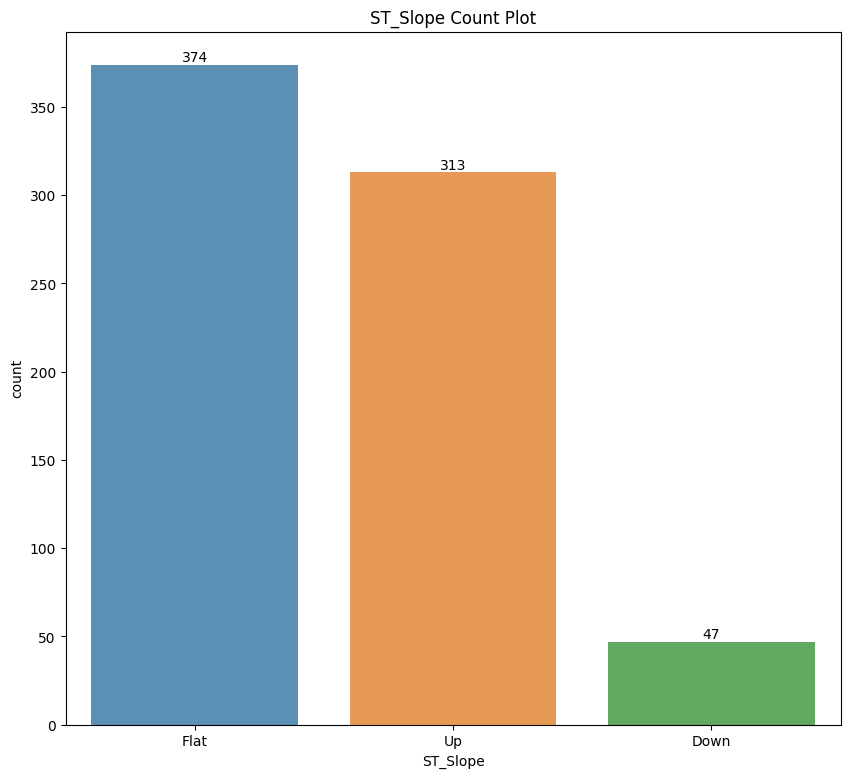

In [289]:
count_plot("ST_Slope")

### Numerical Data Distribution 

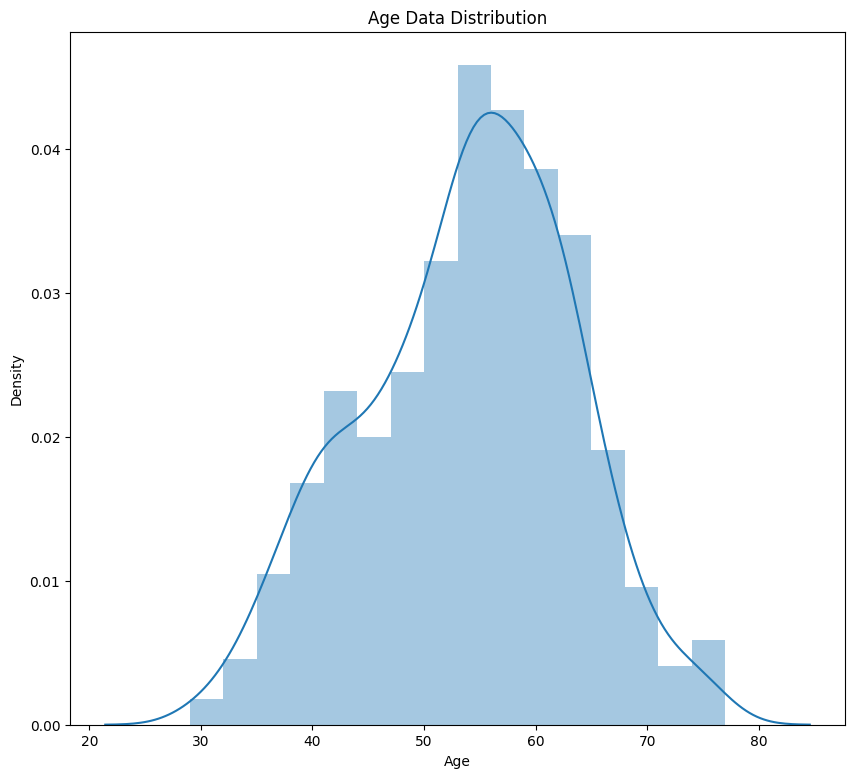

In [290]:
distribution_plot("Age")

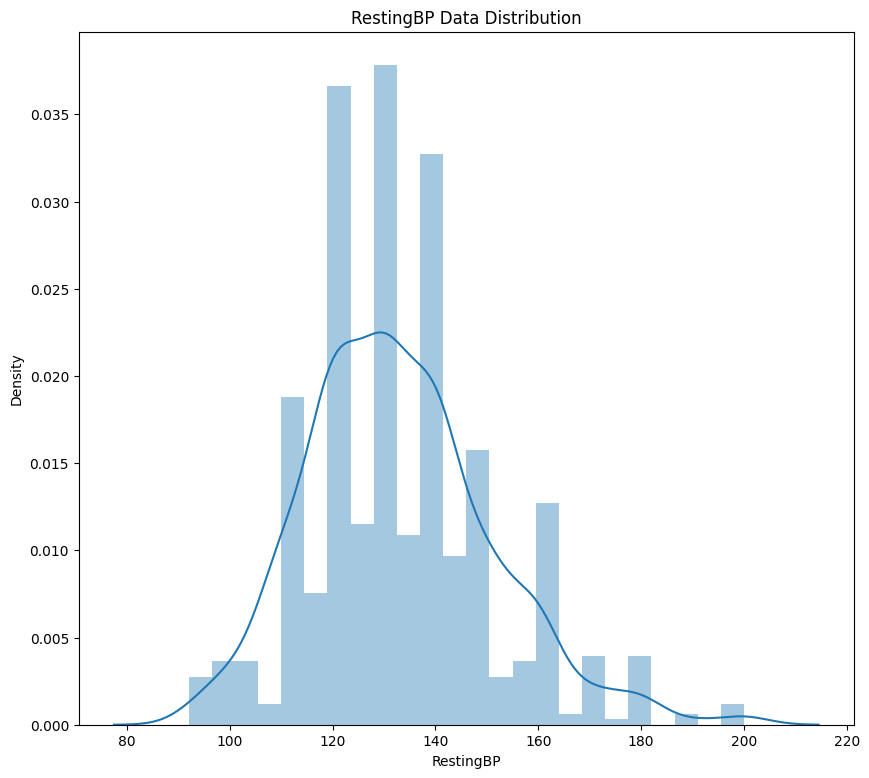

In [291]:
distribution_plot("RestingBP")

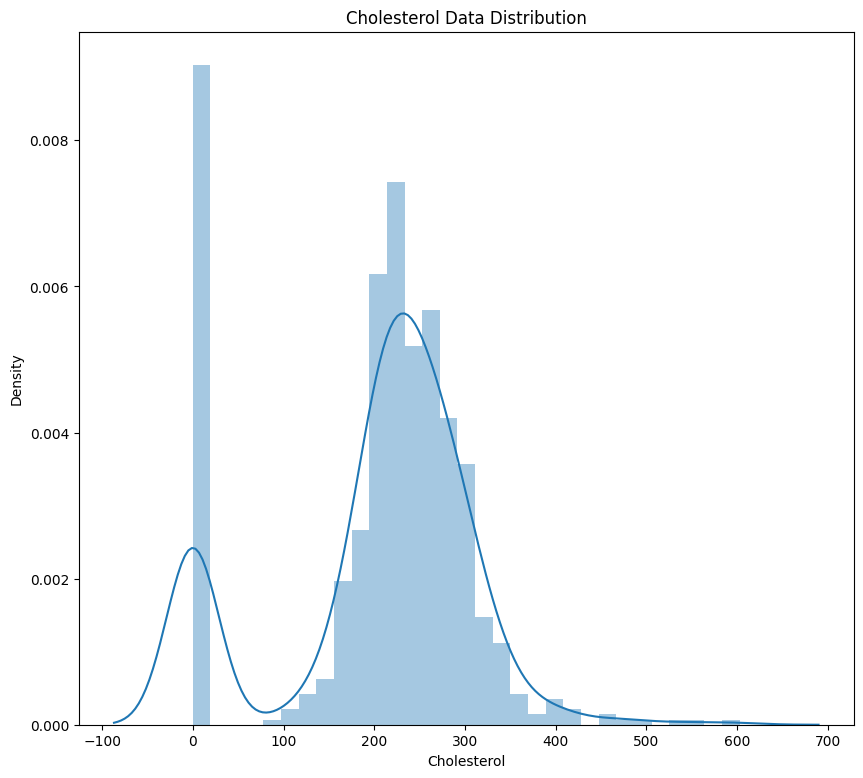

In [292]:
distribution_plot("Cholesterol")

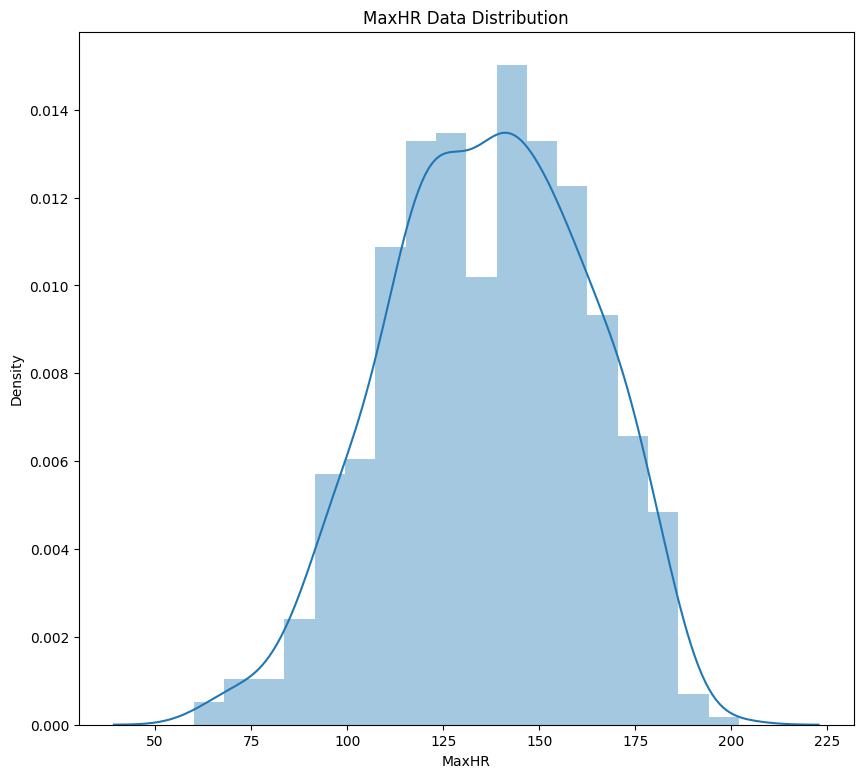

In [293]:
distribution_plot("MaxHR")

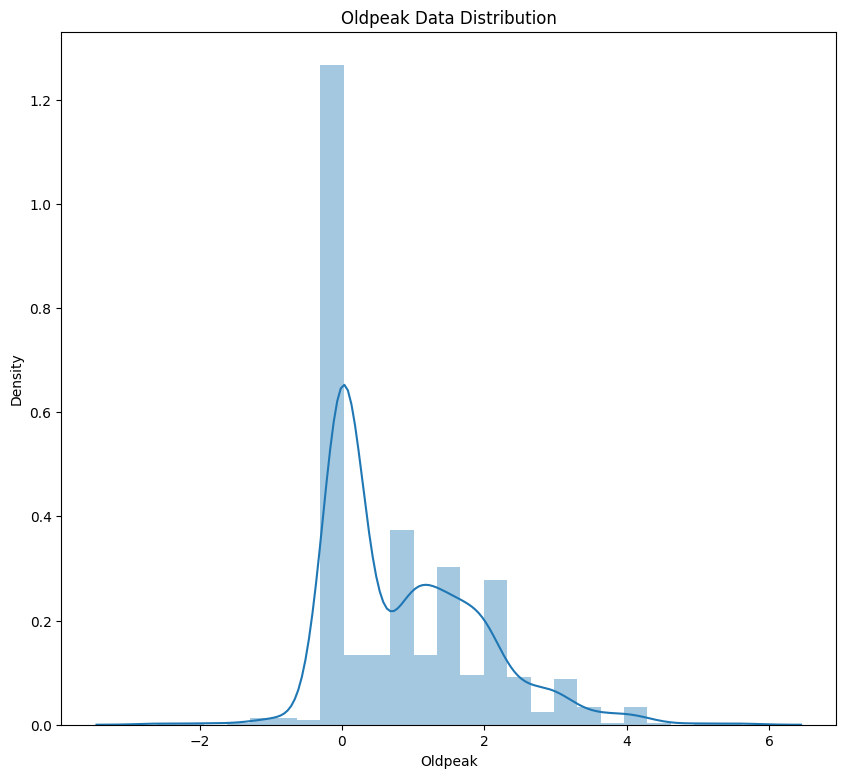

In [294]:
distribution_plot("Oldpeak")

### Scatter Plot

In [295]:
y_train

485    1
486    0
117    1
361    1
296    1
      ..
276    1
201    0
462    1
252    0
62     0
Name: HeartDisease, Length: 734, dtype: int64

<AxesSubplot: xlabel='Age', ylabel='Cholesterol'>

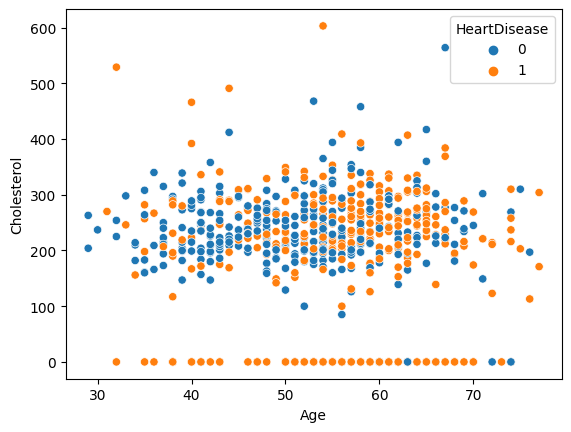

In [296]:
sns.scatterplot(x=X_train["Age"], y=X_train["Cholesterol"], hue=y_train)

In [297]:
tst = pd.concat([X_train, y_train], axis=1)

#### With Hue

<Figure size 1500x1000 with 0 Axes>

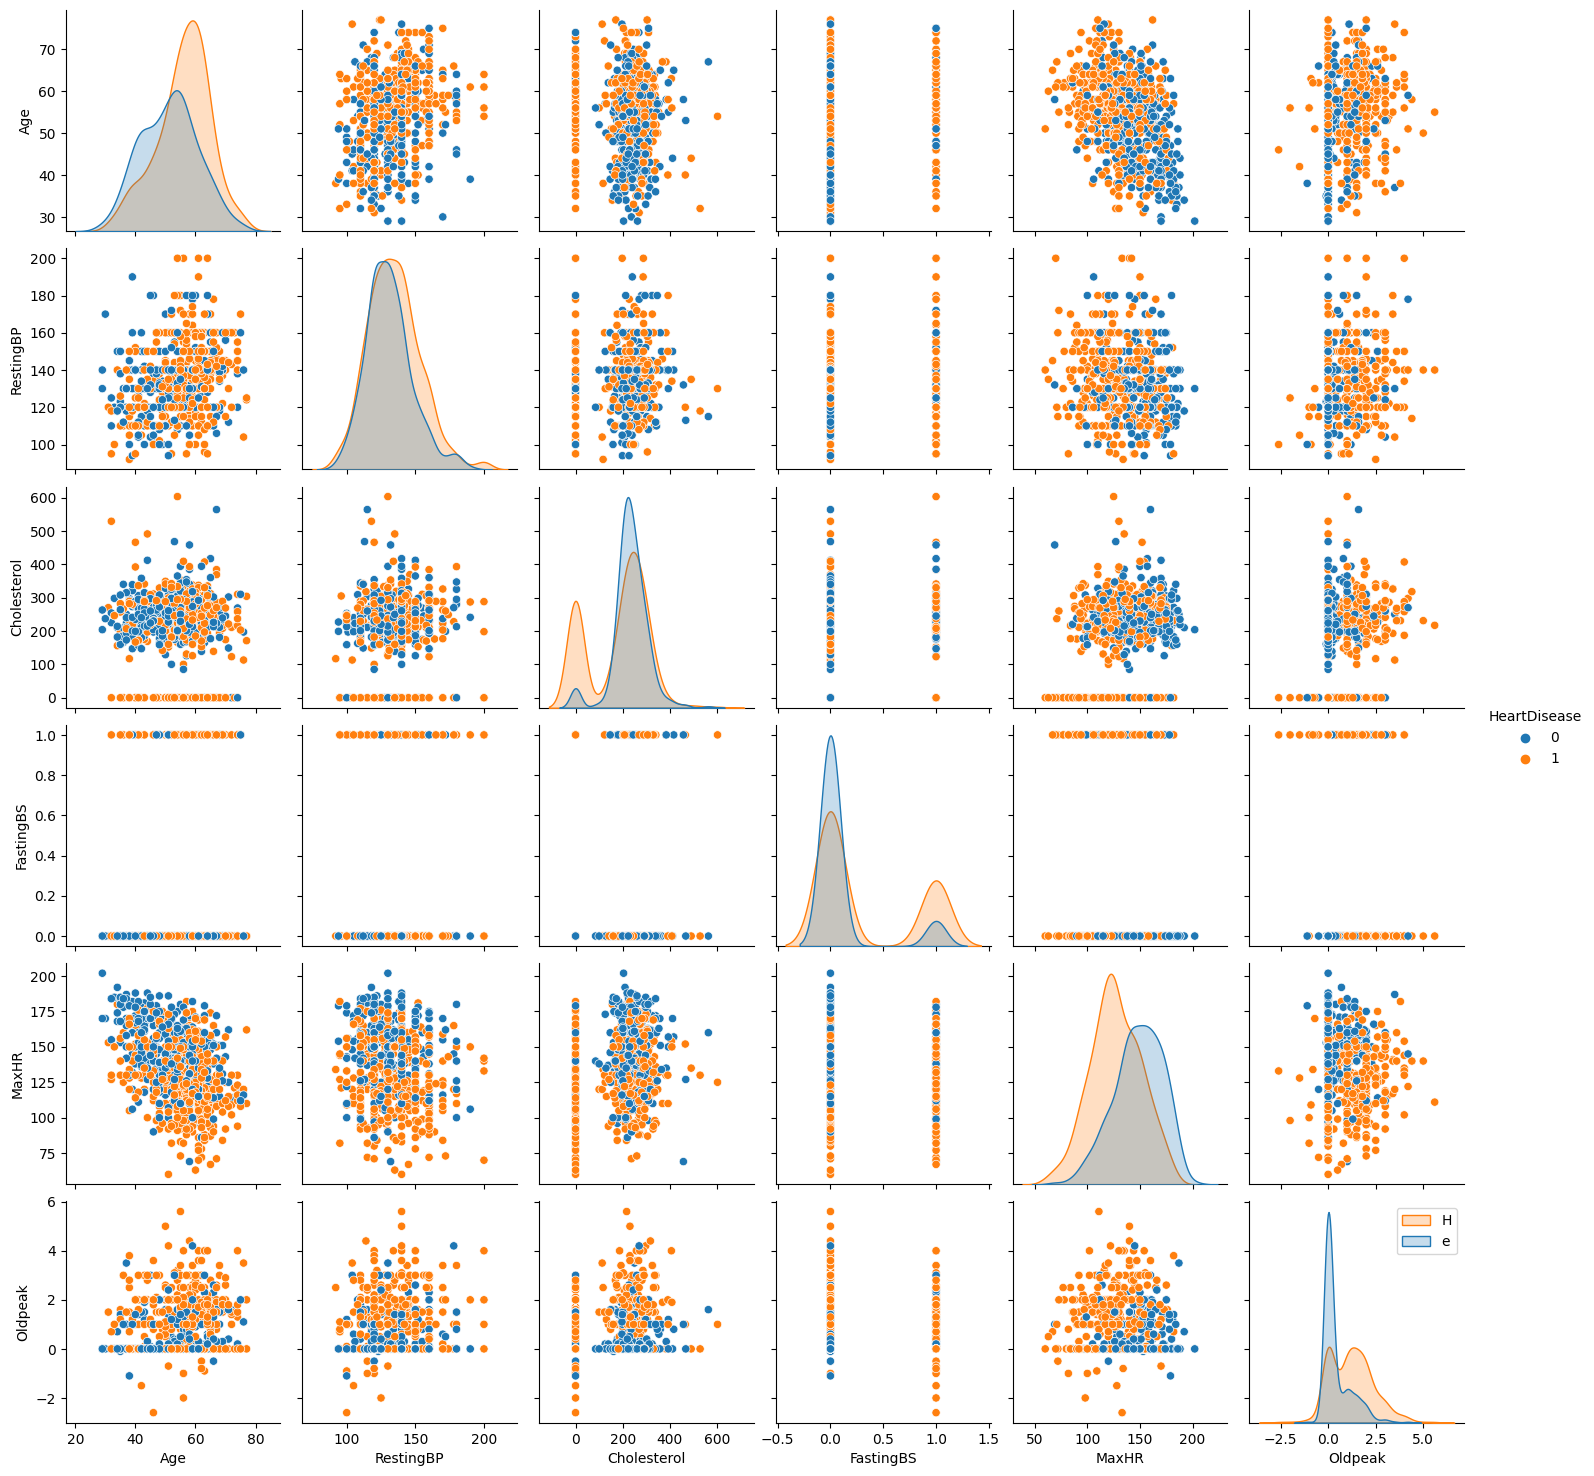

In [298]:
plt.figure(figsize=(15,10))
sns.pairplot(tst, hue="HeartDisease")
plt.legend("HeartDisease")

### Without Hue

<Figure size 1500x1000 with 0 Axes>

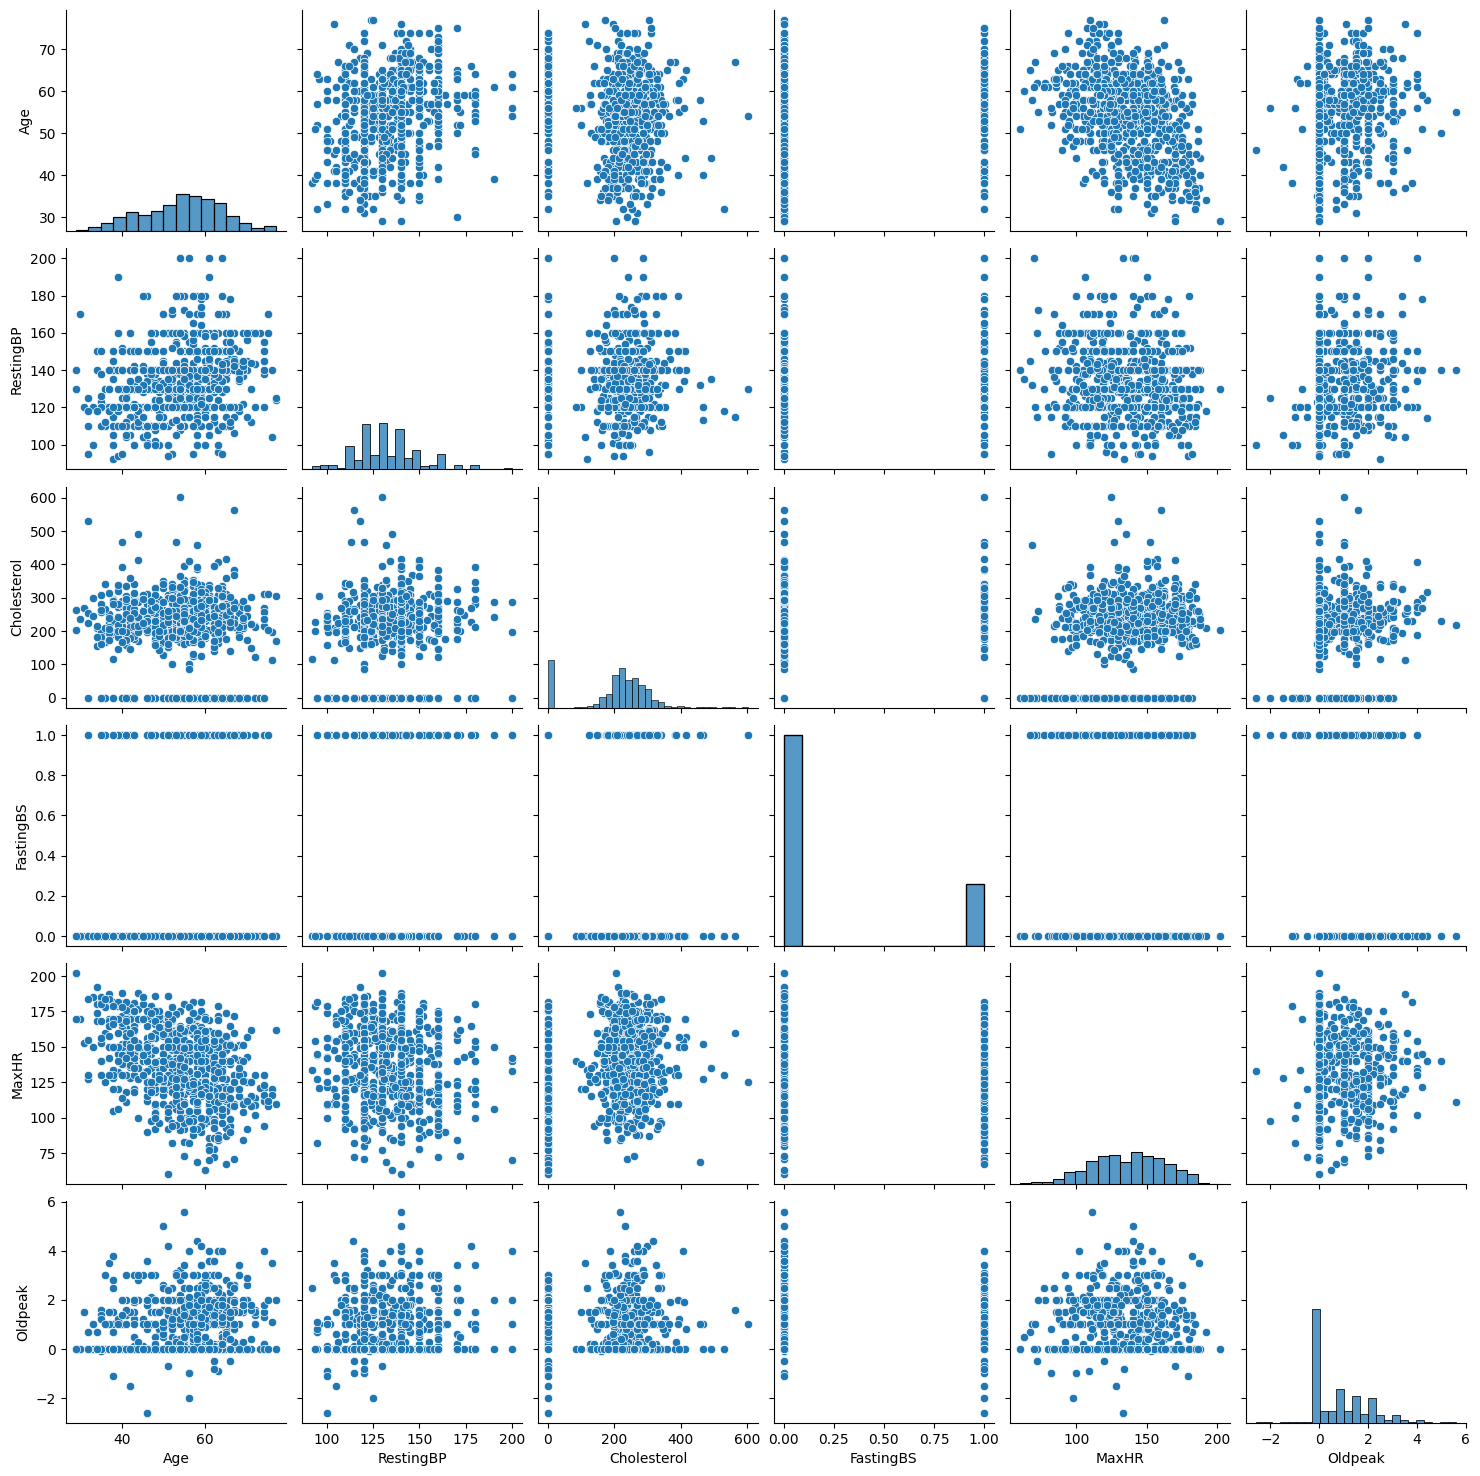

In [299]:
plt.figure(figsize=(15,10))

sns.pairplot(X_train)

We need do:
- Treat outlier
- Treat zero values on Cholesterol
- OldPeak karena ada negative values

In [300]:
X_train[X_train["Cholesterol"] == 0]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
361,47,M,ASY,160,0,0,Normal,124,Y,0.0,Flat
296,50,M,ASY,145,0,1,Normal,139,Y,0.7,Flat
451,64,M,ASY,144,0,0,ST,122,Y,1.0,Flat
346,59,M,ASY,120,0,0,Normal,115,N,0.0,Flat
458,61,M,ASY,134,0,1,ST,86,N,1.5,Flat
...,...,...,...,...,...,...,...,...,...,...,...
437,64,M,ASY,120,0,1,ST,106,N,2.0,Flat
332,38,M,NAP,100,0,0,Normal,179,N,-1.1,Up
395,38,M,ASY,135,0,1,Normal,150,N,0.0,Flat
393,38,M,ASY,150,0,1,Normal,120,Y,0.7,Flat


### Split into Categorical and Numerical 

Setelah kita treat data nya, entar kita merge

In [301]:
X_train_cat = X_train[COLS_CATEGORICAL].copy()
X_train_num = X_train[COLS_NUMS].copy()

X_test_cat = X_test[COLS_CATEGORICAL].copy()
X_test_num = X_test[COLS_NUMS].copy()

In [302]:
X_train_cat.head()

,Sex,ChestPainType,FastingBS,RestingECG,ExerciseAngina,ST_Slope
485,M,ATA,1,ST,Y,Flat
486,M,ATA,1,ST,N,Up
117,F,ASY,1,ST,Y,Flat
361,M,ASY,0,Normal,Y,Flat
296,M,ASY,1,Normal,Y,Flat


In [303]:
X_train_num.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
485,63,139,217,128,1.2
486,55,110,214,180,0.4
117,59,130,338,130,1.5
361,47,160,0,124,0.0
296,50,145,0,139,0.7


### Preprocessing 

#### Treat Outlier `Cholesterol` Column 

In [304]:
X_train_num["Cholesterol"].shape

(734,)

In [305]:
X_train_num[X_train_num["Cholesterol"] == 0]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
361,47,160,0,124,0.0
296,50,145,0,139,0.7
451,64,144,0,122,1.0
346,59,120,0,115,0.0
458,61,134,0,86,1.5
...,...,...,...,...,...
437,64,120,0,106,2.0
332,38,100,0,179,-1.1
395,38,135,0,150,0.0
393,38,150,0,120,0.7


In [312]:
median_value = np.median(X_train_num["Cholesterol"])

In [313]:
X_train_num["Cholesterol"] = np.where(X_train_num["Cholesterol"] == 0, median_value, X_train_num['Cholesterol'])

In [314]:
X_test_num["Cholesterol"] = np.where(X_test_num["Cholesterol"] == 0, median_value, X_test_num['Cholesterol'])

In [315]:
X_train_num["Cholesterol"].head()

485    217.0
486    214.0
117    338.0
361    225.0
296    225.0
Name: Cholesterol, dtype: float64

In [316]:
X_train_num[X_train_num["Cholesterol"] == 0]

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak


In [317]:
X_train["Cholesterol"].shape

(734,)

#### One Hot Encoding 

https://albertum.medium.com/preprocessing-onehotencoder-vs-pandas-get-dummies-3de1f3d77dcc

Meleduk ternyata cols nya wkwk

In [319]:
from sklearn.preprocessing import OneHotEncoder
import joblib

In [321]:
def fit_OHE(data):
    ohe_encoder = OneHotEncoder(handle_unknown="ignore")
    ohe_encoder.fit(data)
    
    return ohe_encoder

In [322]:
def transform_OHE(data, ohe_encoder):
    ohe_col = ohe_encoder.get_feature_names_out(data.columns)
    
    data_ohe = ohe_encoder.transform(data).toarray()
    data_ohe = pd.DataFrame(data = data_ohe,
                            columns = ohe_col,
                            index = data.index)
    
    return data_ohe, ohe_col

In [323]:
ohe_encoder = fit_OHE(data = X_train_cat)

In [324]:
joblib.dump(ohe_encoder, "models/ohe.pkl")

['models/ohe.pkl']

In [325]:
X_train_cat_ohe, ohe_col = transform_OHE(data = X_train_cat,
                                         ohe_encoder = ohe_encoder)

X_test_cat_ohe, ohe_col = transform_OHE(data = X_test_cat,
                                        ohe_encoder = ohe_encoder)

In [326]:
X_train_cat_ohe

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
485,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
486,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0
117,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
361,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
296,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
201,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
462,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
252,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [327]:
X_test_cat_ohe

,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,FastingBS_0,FastingBS_1,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
356,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
763,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
817,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
735,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
892,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
752,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
492,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
622,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


#### StandardScaler 

In [330]:
from sklearn.preprocessing import StandardScaler

In [331]:
scaler = StandardScaler()

In [332]:
scaler.fit(X_train_num)

StandardScaler()

In [333]:
joblib.dump(scaler, "models/scaler.pkl")

['models/scaler.pkl']

In [334]:
X_train_num_scaled = scaler.transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

In [335]:
X_train_num_scaled = pd.DataFrame(data = X_train_num_scaled,
                                  columns = X_train_num.columns,
                                  index = X_train_num.index)

In [336]:
X_train_num_scaled

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
485,0.970012,0.339016,-0.470835,-0.324520,0.317046
486,0.122028,-1.266031,-0.525644,1.689837,-0.440356
117,0.546020,-0.159102,1.739818,-0.247045,0.601071
361,-0.725956,1.501291,-0.324676,-0.479470,-0.819056
296,-0.407962,0.671094,-0.324676,0.101594,-0.156330
...,...,...,...,...,...
276,-0.301964,0.117630,-1.512216,0.527708,1.074447
201,-0.831954,-0.712567,-0.233326,0.527708,-0.819056
462,0.546020,-0.601874,-0.178517,-0.750634,0.411721
252,0.758016,-0.435834,0.899404,-0.828109,-0.819056


In [337]:
X_test_num_scaled = pd.DataFrame(data = X_test_num_scaled,
                                 columns = X_test_num.columns,
                                 index = X_test_num.index)

In [338]:
X_test_num_scaled

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak
356,-0.831954,-0.989299,-0.324676,-0.905584,0.601071
763,0.440022,-0.048409,-0.342946,1.418673,2.210549
817,0.652018,-0.435834,0.278229,0.179069,1.831848
735,-0.513960,-0.712567,-1.000660,0.101594,1.074447
892,-1.573940,0.283669,-0.416025,0.605183,-0.819056
...,...,...,...,...,...
52,-0.937952,0.394362,-0.342946,-0.556946,-0.819056
752,0.228026,-0.435834,0.113801,0.295282,0.317046
492,-0.513960,-0.159102,-0.324676,0.334020,2.021198
622,0.546020,-1.266031,-0.068898,0.217807,0.317046


### Merge Data 

In [339]:
X_train_final = pd.concat([X_train_num_scaled, X_train_cat_ohe], axis=1)

In [340]:
X_train_final.head().T

,485,486,117,361,296
Age,0.970012,0.122028,0.546020,-0.725956,-0.407962
RestingBP,0.339016,-1.266031,-0.159102,1.501291,0.671094
Cholesterol,-0.470835,-0.525644,1.739818,-0.324676,-0.324676
MaxHR,-0.324520,1.689837,-0.247045,-0.479470,0.101594
Oldpeak,0.317046,-0.440356,0.601071,-0.819056,-0.156330
Sex_F,0.000000,0.000000,1.000000,0.000000,0.000000
Sex_M,1.000000,1.000000,0.000000,1.000000,1.000000
ChestPainType_ASY,0.000000,0.000000,1.000000,1.000000,1.000000
ChestPainType_ATA,1.000000,1.000000,0.000000,0.000000,0.000000
ChestPainType_NAP,0.000000,0.000000,0.000000,0.000000,0.000000


In [341]:
X_test_final = pd.concat([X_test_num_scaled, X_test_cat_ohe], axis=1)

In [342]:
X_test_final.head().T

,356,763,817,735,892
Age,-0.831954,0.440022,0.652018,-0.513960,-1.573940
RestingBP,-0.989299,-0.048409,-0.435834,-0.712567,0.283669
Cholesterol,-0.324676,-0.342946,0.278229,-1.000660,-0.416025
MaxHR,-0.905584,1.418673,0.179069,0.101594,0.605183
Oldpeak,0.601071,2.210549,1.831848,1.074447,-0.819056
Sex_F,0.000000,0.000000,0.000000,0.000000,1.000000
Sex_M,1.000000,1.000000,1.000000,1.000000,0.000000
ChestPainType_ASY,1.000000,0.000000,1.000000,0.000000,0.000000
ChestPainType_ATA,0.000000,0.000000,0.000000,0.000000,0.000000
ChestPainType_NAP,0.000000,1.000000,0.000000,1.000000,1.000000


### Modeling Taimu 

#### Baseline Model 

In [343]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix

In [344]:
dummy_clf = DummyClassifier(strategy="most_frequent")

In [345]:
dummy_clf.fit(X_train_final, y_train)

DummyClassifier(strategy='most_frequent')

In [346]:
y_pred_dummy = dummy_clf.predict(X_test_final)

In [347]:
y_pred_dummy

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1])

In [348]:
confusion_matrix(y_test, y_pred_dummy)

array([[  0,  82],
       [  0, 102]])

In [349]:
acc_test_dummy = dummy_clf.score(X_test_final, y_test)
acc_test_dummy

0.5543478260869565

### Modeling with Logistic Regression

In [350]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

In [351]:
logreg = LogisticRegression()

In [352]:
logreg.fit(X_train_final, y_train)

LogisticRegression()

In [353]:
y_pred_train_proba = logreg.predict_proba(X_train_final)

y_pred_train_proba

array([[0.08352841, 0.91647159],
       [0.83061502, 0.16938498],
       [0.05764936, 0.94235064],
       ...,
       [0.11126108, 0.88873892],
       [0.40897236, 0.59102764],
       [0.72103117, 0.27896883]])

In [354]:
y_pred_train = logreg.predict(X_train_final)

In [355]:
acc_train = accuracy_score(y_train, y_pred_train)
acc_train

0.8583106267029973

In [356]:
y_pred_test_proba = logreg.predict_proba(X_test_final)

y_pred_test_proba

array([[0.0486624 , 0.9513376 ],
       [0.87529659, 0.12470341],
       [0.03660435, 0.96339565],
       [0.44148332, 0.55851668],
       [0.85737468, 0.14262532],
       [0.58801549, 0.41198451],
       [0.97901987, 0.02098013],
       [0.51871846, 0.48128154],
       [0.97680233, 0.02319767],
       [0.0164636 , 0.9835364 ],
       [0.45626875, 0.54373125],
       [0.95586647, 0.04413353],
       [0.95208833, 0.04791167],
       [0.91521464, 0.08478536],
       [0.98300187, 0.01699813],
       [0.04600453, 0.95399547],
       [0.94573506, 0.05426494],
       [0.24405274, 0.75594726],
       [0.94159737, 0.05840263],
       [0.47323975, 0.52676025],
       [0.86393962, 0.13606038],
       [0.18719274, 0.81280726],
       [0.93178585, 0.06821415],
       [0.94568488, 0.05431512],
       [0.30734678, 0.69265322],
       [0.01698033, 0.98301967],
       [0.97988333, 0.02011667],
       [0.04512963, 0.95487037],
       [0.00962325, 0.99037675],
       [0.9861459 , 0.0138541 ],
       [0.

In [357]:
y_pred_test = logreg.predict(X_test_final)

In [358]:
acc_test = accuracy_score(y_test, y_pred_test)
acc_test

0.8858695652173914

In [359]:
print(f"Logistic Regression training accuracy {acc_train}")
print(f"Logistic Regression test accuracy {acc_test}")

Logistic Regression training accuracy 0.8583106267029973
Logistic Regression test accuracy 0.8858695652173914


In [360]:
print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



### Cross Validation and Hyperparameter Tuning 

In [361]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [362]:
k_folds = KFold(n_splits = 5)
k_folds

KFold(n_splits=5, random_state=None, shuffle=False)

In [363]:
PARAMS = {
    "penalty": ['l1', 'l2'],
    "C": np.linspace(0.5, 10, 30),
    "solver": ["linear", "saga"],
    "max_iter": [100, 500, 2500, 5000, 10000]
}

In [364]:
PARAMS

{'penalty': ['l1', 'l2'],
 'C': array([ 0.5       ,  0.82758621,  1.15517241,  1.48275862,  1.81034483,
         2.13793103,  2.46551724,  2.79310345,  3.12068966,  3.44827586,
         3.77586207,  4.10344828,  4.43103448,  4.75862069,  5.0862069 ,
         5.4137931 ,  5.74137931,  6.06896552,  6.39655172,  6.72413793,
         7.05172414,  7.37931034,  7.70689655,  8.03448276,  8.36206897,
         8.68965517,  9.01724138,  9.34482759,  9.67241379, 10.        ]),
 'solver': ['linear', 'saga'],
 'max_iter': [100, 500, 2500, 5000, 10000]}

#### Grid Search 

In [365]:
best_logreg_grid = GridSearchCV(estimator = logreg,
                                param_grid = PARAMS,
                                cv = k_folds,
                                verbose = 3)

In [366]:
best_logreg_grid.fit(X_train_final, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 4/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.844 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=100, penalty=l1, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=0.5, max_it

[CV 4/5] END C=0.5, max_iter=10000, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=0.5, max_iter=10000, penalty=l2, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=0.8275862068965517, max_iter=100, penalty=l1, solver=saga

[CV 3/5] END C=0.8275862068965517, max_iter=5000, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 4/5] END C=0.8275862068965517, max_iter=5000, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=0.8275862068965517, max_iter=5000, penalty=l2, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=0.8275862068965517, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=0.8275862068965517, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=0.8275862068965517, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=0.8275862068965517, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=0.8275862068965517, max_iter=10000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=0.8275862068965517, max_iter=10000, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=0.82758620689655

[CV 1/5] END C=1.1551724137931034, max_iter=2500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=1.1551724137931034, max_iter=2500, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=1.1551724137931034, max_iter=2500, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 4/5] END C=1.1551724137931034, max_iter=2500, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=1.1551724137931034, max_iter=2500, penalty=l2, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=1.1551724137931034, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=1.1551724137931034, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=1.1551724137931034, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=1.1551724137931034, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=1.1551724137931034, ma

[CV 4/5] END C=1.4827586206896552, max_iter=500, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=1.4827586206896552, max_iter=500, penalty=l2, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=1.4827586206896552, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=1.4827586206896552, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=1.4827586206896552, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=1.4827586206896552, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=1.4827586206896552, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=1.4827586206896552, max_iter=2500, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=1.4827586206896552, max_iter=2500, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=1.4827586206896552, max_

[CV 5/5] END C=1.8103448275862069, max_iter=500, penalty=l1, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=1.8103448275862069, max_iter=500, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 4/5] END C=1.8103448275862069, max_iter=50

[CV 3/5] END C=2.1379310344827585, max_iter=100, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=2.1379310344827585, max_iter=100, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=2.1379310344827585, max_iter=100, penalty=l1, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=2.1379310344827585, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=2.1379310344827585, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=2.1379310344827585, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=2.1379310344827585, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=2.1379310344827585, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=2.1379310344827585, max_iter=100, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=2.1379310344827585, max_iter=10

[CV 1/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=2.1379310344827585, max_iter=10000, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=2.13793103448

[CV 4/5] END C=2.4655172413793105, max_iter=5000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=2.4655172413793105, max_iter=5000, penalty=l1, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=2.4655172413793105, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=2.4655172413793105, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=2.4655172413793105, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=2.4655172413793105, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=2.4655172413793105, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=2.4655172413793105, max_iter=5000, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=2.4655172413793105, max_iter=5000, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=2.4655172413793105, ma

[CV 3/5] END C=2.793103448275862, max_iter=2500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=2.793103448275862, max_iter=2500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=2.793103448275862, max_iter=2500, penalty=l1, solver=saga;, score=0.808 total time=   0.0s
[CV 1/5] END C=2.793103448275862, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=2.793103448275862, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=2.793103448275862, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=2.793103448275862, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=2.793103448275862, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=2.793103448275862, max_iter=2500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=2.793103448275862, max_iter=250

[CV 2/5] END C=3.1206896551724137, max_iter=500, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=3.1206896551724137, max_iter=500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=3.1206896551724137, max_iter=500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=3.1206896551724137, max_iter=500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=3.1206896551724137, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=3.1206896551724137, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=3.1206896551724137, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=3.1206896551724137, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=3.1206896551724137, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=3.1206896551724137, max_iter=50

[CV 1/5] END C=3.4482758620689653, max_iter=100, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=3.4482758620689653, max_iter=100, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=3.4482758620689653, max_iter=100, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=3.4482758620689653, max_iter=100, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=3.4482758620689653, max_iter=100, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=3.4482758620689653, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=3.4482758620689653, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=3.4482758620689653, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=3.4482758620689653, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=3.4482758620689653, max_iter=10

[CV 2/5] END C=3.4482758620689653, max_iter=10000, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=3.4482758620689653, max_iter=10000, penalty=l2, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=3.4482758620689653, max_iter=10000, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=3.4482758620689653, max_iter=10000, penalty=l2, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=3.775862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=3.775862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=3.775862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=3.775862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=3.775862068965517, max_iter=100, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=3.775862068965517, max_iter=

[CV 1/5] END C=3.775862068965517, max_iter=10000, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=3.775862068965517, max_iter=10000, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=3.775862068965517, max_iter=10000, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=3.775862068965517, max_iter=10000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=3.775862068965517, max_iter=10000, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=3.775862068965517, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=3.775862068965517, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=3.775862068965517, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=3.775862068965517, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=3.775862068965517, max

[CV 4/5] END C=4.103448275862069, max_iter=5000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=4.103448275862069, max_iter=5000, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=4.103448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=4.103448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=4.103448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=4.103448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=4.103448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=4.103448275862069, max_iter=5000, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=4.103448275862069, max_iter=5000, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=4.103448275862069, max_iter=500

[CV 5/5] END C=4.431034482758621, max_iter=2500, penalty=l2, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=4.431034482758621, max_iter=5000, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=4.431034482758621, max_iter=500

[CV 4/5] END C=4.758620689655173, max_iter=2500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=4.758620689655173, max_iter=2500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=4.758620689655173, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=4.758620689655173, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=4.758620689655173, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=4.758620689655173, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=4.758620689655173, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=4.758620689655173, max_iter=2500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=4.758620689655173, max_iter=2500, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=4.758620689655173, max_iter=250

[CV 3/5] END C=5.086206896551724, max_iter=500, penalty=l2, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=5.086206896551724, max_iter=500, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=5.086206896551724, max_iter=500, penalty=l2, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=5.086206896551724, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=5.086206896551724, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=5.086206896551724, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=5.086206896551724, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=5.086206896551724, max_iter=2500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=5.086206896551724, max_iter=2500, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=5.086206896551724, max_iter=2500, 

[CV 3/5] END C=5.413793103448276, max_iter=500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=5.413793103448276, max_iter=500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=5.413793103448276, max_iter=500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=5.413793103448276, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=5.413793103448276, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=5.413793103448276, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=5.413793103448276, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=5.413793103448276, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=5.413793103448276, max_iter=500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=5.413793103448276, max_iter=500, penalty

[CV 5/5] END C=5.741379310344827, max_iter=100, penalty=l2, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=5.741379310344827, max_iter=500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=5.741379310344827, max_iter=500, penalty

[CV 1/5] END C=6.068965517241379, max_iter=100, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=6.068965517241379, max_iter=100, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=6.068965517241379, max_iter=100, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=6.068965517241379, max_iter=100, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=6.068965517241379, max_iter=100, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=6.068965517241379, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=6.068965517241379, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=6.068965517241379, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=6.068965517241379, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=6.068965517241379, max_iter=100, penalty

[CV 3/5] END C=6.068965517241379, max_iter=10000, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=6.068965517241379, max_iter=10000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=6.068965517241379, max_iter=10000, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=6.068965517241379, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=6.068965517241379, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=6.068965517241379, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=6.068965517241379, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=6.068965517241379, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=6.068965517241379, max_iter=10000, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=6.068965517241379, max

[CV 5/5] END C=6.396551724137931, max_iter=5000, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=6.396551724137931, max_iter=5000, penalty=l2, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=6.396551724137931, max_iter=500

[CV 2/5] END C=6.724137931034482, max_iter=2500, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=6.724137931034482, max_iter=2500, penalty=l2, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=6.724137931034482, max_iter=2500, penalty=l2, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=6.724137931034482, max_iter=2500, penalty=l2, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=6.724137931034482, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=6.724137931034482, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=6.724137931034482, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=6.724137931034482, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=6.724137931034482, max_iter=5000, penalty=l1, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=6.724137931034482, max_iter=500

[CV 2/5] END C=7.051724137931034, max_iter=2500, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=7.051724137931034, max_iter=2500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=7.051724137931034, max_iter=2500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=7.051724137931034, max_iter=2500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=7.051724137931034, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=7.051724137931034, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=7.051724137931034, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=7.051724137931034, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=7.051724137931034, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=7.051724137931034, max_iter=250

[CV 3/5] END C=7.379310344827586, max_iter=500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=7.379310344827586, max_iter=500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=7.379310344827586, max_iter=500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=7.379310344827586, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=7.379310344827586, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=7.379310344827586, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=7.379310344827586, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=7.379310344827586, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=7.379310344827586, max_iter=500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=7.379310344827586, max_iter=500, penalty

[CV 2/5] END C=7.706896551724138, max_iter=100, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=7.706896551724138, max_iter=100, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=7.706896551724138, max_iter=100, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=7.706896551724138, max_iter=100, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=7.706896551724138, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=7.706896551724138, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=7.706896551724138, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=7.706896551724138, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=7.706896551724138, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=7.706896551724138, max_iter=100, penalty

[CV 1/5] END C=7.706896551724138, max_iter=10000, penalty=l1, solver=saga;, score=0.884 total time=   0.1s
[CV 2/5] END C=7.706896551724138, max_iter=10000, penalty=l1, solver=saga;, score=0.864 total time=   0.1s
[CV 3/5] END C=7.706896551724138, max_iter=10000, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=7.706896551724138, max_iter=10000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=7.706896551724138, max_iter=10000, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=7.706896551724138, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=7.706896551724138, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=7.706896551724138, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=7.706896551724138, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=7.706896551724138, max

[CV 1/5] END C=8.03448275862069, max_iter=5000, penalty=l1, solver=saga;, score=0.884 total time=   0.1s
[CV 2/5] END C=8.03448275862069, max_iter=5000, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=8.03448275862069, max_iter=5000, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=8.03448275862069, max_iter=5000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=8.03448275862069, max_iter=5000, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=8.03448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=8.03448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=8.03448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=8.03448275862069, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=8.03448275862069, max_iter=5000, penalty

[CV 3/5] END C=8.362068965517242, max_iter=2500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=8.362068965517242, max_iter=2500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=8.362068965517242, max_iter=2500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=8.362068965517242, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=8.362068965517242, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=8.362068965517242, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=8.362068965517242, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=8.362068965517242, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=8.362068965517242, max_iter=2500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=8.362068965517242, max_iter=250

[CV 4/5] END C=8.689655172413794, max_iter=500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=8.689655172413794, max_iter=500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=8.689655172413794, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=8.689655172413794, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=8.689655172413794, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=8.689655172413794, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=8.689655172413794, max_iter=500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=8.689655172413794, max_iter=500, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=8.689655172413794, max_iter=500, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=8.689655172413794, max_iter=500, penalty

[CV 5/5] END C=9.017241379310345, max_iter=100, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=9.017241379310345, max_iter=100, penalty=l2, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=9.017241379310345, max_iter=100, penalty

[CV 5/5] END C=9.017241379310345, max_iter=10000, penalty=l1, solver=saga;, score=0.815 total time=   0.1s
[CV 1/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=9.017241379310345, max_iter=10000, penalty=l2, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=9.017241379310345, max

[CV 3/5] END C=9.344827586206897, max_iter=5000, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=9.344827586206897, max_iter=5000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=9.344827586206897, max_iter=5000, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=9.344827586206897, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=9.344827586206897, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=9.344827586206897, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=9.344827586206897, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=9.344827586206897, max_iter=5000, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=9.344827586206897, max_iter=5000, penalty=l2, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=9.344827586206897, max_iter=500

[CV 2/5] END C=9.672413793103448, max_iter=2500, penalty=l1, solver=saga;, score=0.864 total time=   0.0s
[CV 3/5] END C=9.672413793103448, max_iter=2500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=9.672413793103448, max_iter=2500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=9.672413793103448, max_iter=2500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=9.672413793103448, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=9.672413793103448, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=9.672413793103448, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=9.672413793103448, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=9.672413793103448, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=9.672413793103448, max_iter=250

[CV 1/5] END C=10.0, max_iter=2500, penalty=l1, solver=saga;, score=0.884 total time=   0.0s
[CV 2/5] END C=10.0, max_iter=2500, penalty=l1, solver=saga;, score=0.864 total time=   0.1s
[CV 3/5] END C=10.0, max_iter=2500, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=10.0, max_iter=2500, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=10.0, max_iter=2500, penalty=l1, solver=saga;, score=0.815 total time=   0.0s
[CV 1/5] END C=10.0, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=10.0, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=10.0, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=10.0, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=10.0, max_iter=2500, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 1/5] END C=10.0, max_iter=2500, penalty=l2, solver=saga;, score=0.

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(),
             param_grid={'C': array([ 0.5       ,  0.82758621,  1.15517241,  1.48275862,  1.81034483,
        2.13793103,  2.46551724,  2.79310345,  3.12068966,  3.44827586,
        3.77586207,  4.10344828,  4.43103448,  4.75862069,  5.0862069 ,
        5.4137931 ,  5.74137931,  6.06896552,  6.39655172,  6.72413793,
        7.05172414,  7.37931034,  7.70689655,  8.03448276,  8.36206897,
        8.68965517,  9.01724138,  9.34482759,  9.67241379, 10.        ]),
                         'max_iter': [100, 500, 2500, 5000, 10000],
                         'penalty': ['l1', 'l2'],
                         'solver': ['linear', 'saga']},
             verbose=3)

In [367]:
best_logreg_grid.best_params_

{'C': 1.1551724137931034, 'max_iter': 100, 'penalty': 'l2', 'solver': 'saga'}

In [368]:
best_logreg_grid.best_score_

0.8528096169974839

In [369]:
y_pred_test_grid = best_logreg_grid.predict(X_test_final)

In [370]:
acc_test_grid = accuracy_score(y_test, y_pred_test_grid)
acc_test_grid

0.8858695652173914

In [371]:
print(classification_report(y_test, y_pred_test_grid))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.89       184



#### Random Search 

In [372]:
best_logreg_random = RandomizedSearchCV(estimator = logreg,
                                        param_distributions = PARAMS,
                                        cv = k_folds,
                                        verbose = 3)

In [373]:
best_logreg_random.fit(X_train_final, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=0.884 total time=   0.1s
[CV 2/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=0.864 total time=   0.1s
[CV 3/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=0.857 total time=   0.0s
[CV 4/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=0.837 total time=   0.0s
[CV 5/5] END C=10.0, max_iter=5000, penalty=l1, solver=saga;, score=0.815 total time=   0.1s
[CV 1/5] END C=7.379310344827586, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 2/5] END C=7.379310344827586, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 3/5] END C=7.379310344827586, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 4/5] END C=7.379310344827586, max_iter=100, penalty=l2, solver=linear;, score=nan total time=   0.0s
[CV 5/5] END C=7.379310344827586, max_iter=100, penalt

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=LogisticRegression(),
                   param_distributions={'C': array([ 0.5       ,  0.82758621,  1.15517241,  1.48275862,  1.81034483,
        2.13793103,  2.46551724,  2.79310345,  3.12068966,  3.44827586,
        3.77586207,  4.10344828,  4.43103448,  4.75862069,  5.0862069 ,
        5.4137931 ,  5.74137931,  6.06896552,  6.39655172,  6.72413793,
        7.05172414,  7.37931034,  7.70689655,  8.03448276,  8.36206897,
        8.68965517,  9.01724138,  9.34482759,  9.67241379, 10.        ]),
                                        'max_iter': [100, 500, 2500, 5000,
                                                     10000],
                                        'penalty': ['l1', 'l2'],
                                        'solver': ['linear', 'saga']},
                   verbose=3)

In [374]:
best_logreg_random.best_params_

{'solver': 'saga', 'penalty': 'l1', 'max_iter': 5000, 'C': 10.0}

In [375]:
best_logreg_random.best_score_

0.8514490727797968

In [376]:
y_pred_test_random = best_logreg_random.predict(X_test_final)

In [377]:
acc_test_random = accuracy_score(y_test, y_pred_test_random)
acc_test_random

0.8913043478260869

In [378]:
print(classification_report(y_test, y_pred_test_random))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88        82
           1       0.89      0.91      0.90       102

    accuracy                           0.89       184
   macro avg       0.89      0.89      0.89       184
weighted avg       0.89      0.89      0.89       184



### Final Result

- get baseline
- get logreg vanilla
- get logreg grid
- get logreg random

In [379]:
result_data = {
    "baseline": acc_test_dummy,
    "logreg_vanilla": acc_test,
    "logreg_grid": acc_test_grid,
    "logreg_random": acc_test_random
}

In [380]:
result_data

{'baseline': 0.5543478260869565,
 'logreg_vanilla': 0.8858695652173914,
 'logreg_grid': 0.8858695652173914,
 'logreg_random': 0.8913043478260869}

https://stackoverflow.com/questions/17839973/constructing-pandas-dataframe-from-values-in-variables-gives-valueerror-if-usi

In [381]:
data = pd.Series(result_data).to_frame("Result")

data

,Result
baseline,0.554348
logreg_vanilla,0.885870
logreg_grid,0.885870
logreg_random,0.891304


### Conclusion

- Semua model bisa mengalahkan baseline, which is good
- Dari semua eksperimen, ternyata menggunakan model yang menggunakan RandomSearch memiliki hasil yang paling bagus walaupun perbedaannya hanya sedikit saja dari model yang lain
- Mungkin next nya pengen coba treat / preprocessing data nya lebih lagi
- Coba Feature Engineering mungkin (?) tapi kudu ngerti konteks data nya dulu kawoakoakwo
- Next kalo modeling langsung pake random search aja